In [116]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('ggplot')

In [117]:
data = [[828, 920, 1234567, 1020, 1111],
            [824, 910, 2345612, 1090, 1234],
            [880, 900, 3456123, 1010, 1000],
            [870, 990, 2312123, 1001, 1122],
            [860, 980, 3223123, 1008, 1133],
            [850, 970, 2432123, 1100, 1221]]
data = np.float32(data)

In [118]:
data

array([[8.280000e+02, 9.200000e+02, 1.234567e+06, 1.020000e+03,
        1.111000e+03],
       [8.240000e+02, 9.100000e+02, 2.345612e+06, 1.090000e+03,
        1.234000e+03],
       [8.800000e+02, 9.000000e+02, 3.456123e+06, 1.010000e+03,
        1.000000e+03],
       [8.700000e+02, 9.900000e+02, 2.312123e+06, 1.001000e+03,
        1.122000e+03],
       [8.600000e+02, 9.800000e+02, 3.223123e+06, 1.008000e+03,
        1.133000e+03],
       [8.500000e+02, 9.700000e+02, 2.432123e+06, 1.100000e+03,
        1.221000e+03]], dtype=float32)

In [41]:
df = pd.DataFrame(data)
df.head(3)

,0,1,2,3,4
0,828.0,920.0,1234567.0,1020.0,1111.0
1,824.0,910.0,2345612.0,1090.0,1234.0
2,880.0,900.0,3456123.0,1010.0,1000.0


# 단위가 제각각임 -> 정규화

In [42]:
x = data[:,:-1]
y = data[:,[-1]]

In [43]:
x,y

(array([[8.280000e+02, 9.200000e+02, 1.234567e+06, 1.020000e+03],
        [8.240000e+02, 9.100000e+02, 2.345612e+06, 1.090000e+03],
        [8.800000e+02, 9.000000e+02, 3.456123e+06, 1.010000e+03],
        [8.700000e+02, 9.900000e+02, 2.312123e+06, 1.001000e+03],
        [8.600000e+02, 9.800000e+02, 3.223123e+06, 1.008000e+03],
        [8.500000e+02, 9.700000e+02, 2.432123e+06, 1.100000e+03]],
       dtype=float32),
 array([[1111.],
        [1234.],
        [1000.],
        [1122.],
        [1133.],
        [1221.]], dtype=float32))

In [44]:
scalerF = MinMaxScaler()
# x는 minmax스케일러로 정규화
x_dataN = scalerF.fit_transform(x)  

In [45]:
x_dataN

array([[0.0714283 , 0.22222233, 0.        , 0.19191933],
       [0.        , 0.11111164, 0.50012016, 0.89899063],
       [1.        , 0.        , 1.        , 0.09090996],
       [0.8214283 , 1.        , 0.48504567, 0.        ],
       [0.6428566 , 0.8888893 , 0.8951186 , 0.07070732],
       [0.4642849 , 0.7777777 , 0.5390618 , 1.        ]], dtype=float32)

data
```
[[828, 920, 1234567, 1020, 1111],
[824, 910, 2345612, 1090, 1234],
[880, 900, 3456123, 1010, 1000],
[870, 990, 2312123, 1001, 1122],
[860, 980, 3223123, 1008, 1133],
[850, 970, 2432123, 1100, 1221]]

각 피처별 0 ~ 1 사이 값으로

(x - 가장 작은 값)  
------------------------
(가장 큰값 - 가장 작은값)
```


In [46]:
scaleL  = MinMaxScaler()
# y는 minmax스케일러로 정규화
y_dataN = scaleL.fit_transform(y) 
y_dataN

array([[0.47435904],
       [1.0000005 ],
       [0.        ],
       [0.52136755],
       [0.56837654],
       [0.94444466]], dtype=float32)

In [47]:
dense = Dense(units =1 , input_dim = 4 )
model = Sequential([dense])
model.compile(loss='mse',optimizer=Adam(0.1))
h = model.fit(x_dataN,y_dataN ,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 146ms/step - loss: 0.4364
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2643
Epoch 3/1000
1/1 [==============================] - 0s 997us/step - loss: 0.2028
Epoch 4/1000
1/1 [==============================] - 0s 996us/step - loss: 0.1815
Epoch 5/1000
1/1 [==============================] - 0s 996us/step - loss: 0.1469
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1015
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 8/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0409
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0439
Epoch 11/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0473
Epoch 12/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0444
Epoch 13/1000
1/1 [================

1/1 [==============================] - 0s 996us/step - loss: 0.0033
Epoch 201/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0033
Epoch 202/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 203/1000
1/1 [==============================] - 0s 996us/step - loss: 0.0033
Epoch 204/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0033
Epoch 205/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 206/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 207/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 208/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 209/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 210/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 211/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 212/1000
1/1 [=====

1/1 [==============================] - 0s 999us/step - loss: 0.0033
Epoch 399/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 400/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 401/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0033
Epoch 402/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 403/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 404/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 405/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 406/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 407/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 408/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 409/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 410/1000
1/1 [===

1/1 [==============================] - 0s 998us/step - loss: 0.0033
Epoch 597/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 598/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 599/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 600/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0033
Epoch 601/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 602/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 603/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0033
Epoch 604/1000
1/1 [==============================] - 0s 993us/step - loss: 0.0033
Epoch 605/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0033
Epoch 606/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 607/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 608/1000
1/1 [=

1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 795/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 796/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 797/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 798/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 799/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 800/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 801/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 802/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 803/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 804/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0033
Epoch 805/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 806/1000
1/1 [===============

1/1 [==============================] - 0s 998us/step - loss: 0.0033
Epoch 894/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0033
Epoch 895/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 896/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0033
Epoch 897/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 898/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 899/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 900/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 901/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 902/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 903/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 904/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0033
Epoch 905/1000
1/1 [=

In [48]:
h.history.keys()

dict_keys(['loss'])

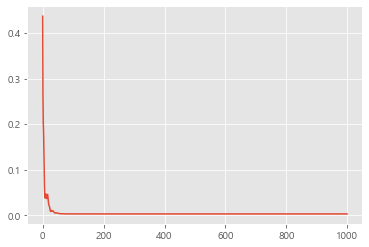

In [49]:
plt.plot(h.history['loss'])

In [50]:
w,b = model.get_weights()
w,b

(array([[-0.6086136 ],
        [ 0.46059242],
        [ 0.19812796],
        [ 0.43425238]], dtype=float32),
 array([0.38282946], dtype=float32))

1번째 행의 예측값   
[828, 920, 1234567, 1020]    
실제값 :  1111


```

model.predict(
    [[828, 920, 1234567, 1020]]
    
) matmul 형식을 맞춰야함
``` 

-> 이런 식으로 쓰면 안됨 ( 정규화 한 데이터가 아니기때문)


In [51]:
xn = scalerF.transform(
           [[828, 920, 1234567, 1020]]
)
result  = model.predict(xn)

In [52]:
result

array([[0.52505285]], dtype=float32)

# 역정규화 

- 라벨은 굳이 정규화 할필요가 없는데
- 방금 같은 경우 했으니까 -> y 라벨에 대해 역정규화

In [53]:
scaleL.inverse_transform(result)

array([[1122.8623]], dtype=float32)

# 보스턴 데이터 셋 정규화 후 합습 하여 첫째 행 medv 예측

In [69]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

df_boston =pd.DataFrame(boston['data'],columns=boston['feature_names'])
df_boston['medv'] = boston['target']
x = df_boston.iloc[ :, : -1]
y = boston['target']
df_boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [70]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [71]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [72]:
scalerF = MinMaxScaler()
x_dataN = scalerF.fit_transform(x)  

In [76]:
x_dataN.shape

(506, 13)

In [78]:
dense = Dense(units =1 , input_dim = 13 )
model = Sequential([dense])
model.compile(loss='mse',optimizer=Adam(0.1))
h = model.fit(x_dataN,y ,epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 599us/step - loss: 435.8765
Epoch 2/1000
16/16 [==============================] - 0s 532us/step - loss: 209.3077
Epoch 3/1000
16/16 [==============================] - 0s 532us/step - loss: 136.5624
Epoch 4/1000
16/16 [==============================] - 0s 532us/step - loss: 114.0397
Epoch 5/1000
16/16 [==============================] - 0s 532us/step - loss: 100.2828
Epoch 6/1000
16/16 [==============================] - 0s 532us/step - loss: 88.0946
Epoch 7/1000
16/16 [==============================] - 0s 532us/step - loss: 78.6462
Epoch 8/1000
16/16 [==============================] - 0s 465us/step - loss: 71.3398
Epoch 9/1000
16/16 [==============================] - 0s 465us/step - loss: 65.4221
Epoch 10/1000
16/16 [==============================] - 0s 532us/step - loss: 61.5591
Epoch 11/1000
16/16 [==============================] - 0s 532us/step - loss: 58.1975
Epoch 12/1000
16/16 [==============================] - 0s 532us/step 

16/16 [==============================] - 0s 465us/step - loss: 22.5170
Epoch 193/1000
16/16 [==============================] - 0s 465us/step - loss: 22.3838
Epoch 194/1000
16/16 [==============================] - 0s 465us/step - loss: 22.4953
Epoch 195/1000
16/16 [==============================] - 0s 465us/step - loss: 22.6784
Epoch 196/1000
16/16 [==============================] - 0s 465us/step - loss: 22.5138
Epoch 197/1000
16/16 [==============================] - 0s 465us/step - loss: 22.3582
Epoch 198/1000
16/16 [==============================] - 0s 465us/step - loss: 22.3035
Epoch 199/1000
16/16 [==============================] - 0s 465us/step - loss: 22.3765
Epoch 200/1000
16/16 [==============================] - 0s 532us/step - loss: 22.2827
Epoch 201/1000
16/16 [==============================] - 0s 465us/step - loss: 22.2835
Epoch 202/1000
16/16 [==============================] - 0s 532us/step - loss: 22.2615
Epoch 203/1000
16/16 [==============================] - 0s 465us/step

16/16 [==============================] - 0s 465us/step - loss: 21.9404
Epoch 383/1000
16/16 [==============================] - 0s 531us/step - loss: 22.1927
Epoch 384/1000
16/16 [==============================] - 0s 532us/step - loss: 22.1464
Epoch 385/1000
16/16 [==============================] - 0s 532us/step - loss: 22.0815
Epoch 386/1000
16/16 [==============================] - 0s 532us/step - loss: 22.1253
Epoch 387/1000
16/16 [==============================] - 0s 532us/step - loss: 22.4726
Epoch 388/1000
16/16 [==============================] - 0s 465us/step - loss: 22.4547
Epoch 389/1000
16/16 [==============================] - 0s 532us/step - loss: 22.1078
Epoch 390/1000
16/16 [==============================] - 0s 465us/step - loss: 22.1221
Epoch 391/1000
16/16 [==============================] - 0s 532us/step - loss: 22.2667
Epoch 392/1000
16/16 [==============================] - 0s 598us/step - loss: 22.0547
Epoch 393/1000
16/16 [==============================] - 0s 465us/step

16/16 [==============================] - 0s 465us/step - loss: 22.2021
Epoch 573/1000
16/16 [==============================] - 0s 532us/step - loss: 22.0053
Epoch 574/1000
16/16 [==============================] - 0s 466us/step - loss: 22.0121
Epoch 575/1000
16/16 [==============================] - 0s 465us/step - loss: 22.1103
Epoch 576/1000
16/16 [==============================] - 0s 465us/step - loss: 22.1614
Epoch 577/1000
16/16 [==============================] - 0s 465us/step - loss: 22.0921
Epoch 578/1000
16/16 [==============================] - 0s 465us/step - loss: 22.2136
Epoch 579/1000
16/16 [==============================] - 0s 532us/step - loss: 22.0703
Epoch 580/1000
16/16 [==============================] - 0s 532us/step - loss: 22.2737
Epoch 581/1000
16/16 [==============================] - 0s 532us/step - loss: 22.1346
Epoch 582/1000
16/16 [==============================] - 0s 532us/step - loss: 22.2238
Epoch 583/1000
16/16 [==============================] - 0s 532us/step

16/16 [==============================] - 0s 465us/step - loss: 22.4191
Epoch 763/1000
16/16 [==============================] - 0s 465us/step - loss: 22.0267
Epoch 764/1000
16/16 [==============================] - 0s 465us/step - loss: 22.1045
Epoch 765/1000
16/16 [==============================] - 0s 465us/step - loss: 22.1666
Epoch 766/1000
16/16 [==============================] - 0s 465us/step - loss: 22.0664
Epoch 767/1000
16/16 [==============================] - 0s 465us/step - loss: 21.9664
Epoch 768/1000
16/16 [==============================] - 0s 532us/step - loss: 22.0709
Epoch 769/1000
16/16 [==============================] - 0s 532us/step - loss: 22.1373
Epoch 770/1000
16/16 [==============================] - 0s 532us/step - loss: 22.3191
Epoch 771/1000
16/16 [==============================] - 0s 532us/step - loss: 21.9804
Epoch 772/1000
16/16 [==============================] - 0s 532us/step - loss: 22.0406
Epoch 773/1000
16/16 [==============================] - 0s 465us/step

16/16 [==============================] - 0s 532us/step - loss: 21.9902
Epoch 953/1000
16/16 [==============================] - 0s 465us/step - loss: 22.1690
Epoch 954/1000
16/16 [==============================] - 0s 532us/step - loss: 22.0697
Epoch 955/1000
16/16 [==============================] - 0s 532us/step - loss: 22.1943
Epoch 956/1000
16/16 [==============================] - 0s 465us/step - loss: 22.3561
Epoch 957/1000
16/16 [==============================] - 0s 532us/step - loss: 22.5546
Epoch 958/1000
16/16 [==============================] - 0s 532us/step - loss: 22.4809
Epoch 959/1000
16/16 [==============================] - 0s 532us/step - loss: 22.4945
Epoch 960/1000
16/16 [==============================] - 0s 465us/step - loss: 22.0840
Epoch 961/1000
16/16 [==============================] - 0s 465us/step - loss: 22.2407
Epoch 962/1000
16/16 [==============================] - 0s 535us/step - loss: 22.0852
Epoch 963/1000
16/16 [==============================] - 0s 465us/step

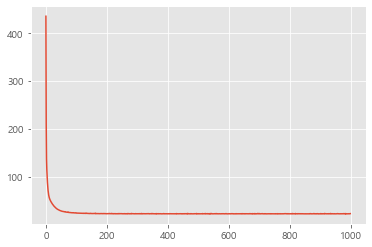

In [103]:
plt.plot(h.history['loss'])

In [80]:
w,b = model.get_weights()
w,b

(array([[ -9.685984  ],
        [  4.5451593 ],
        [  0.5868081 ],
        [  2.740791  ],
        [ -8.6287565 ],
        [ 19.854893  ],
        [  0.07251245],
        [-16.301308  ],
        [  7.050704  ],
        [ -6.4844394 ],
        [ -9.012695  ],
        [  3.6549625 ],
        [-18.948803  ]], dtype=float32),
 array([26.603043], dtype=float32))

In [95]:
np.array(x.iloc[:,0])

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

In [100]:
model.predict(x_dataN)[0]

array([29.886993], dtype=float32)

In [110]:
boston['data'][0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [111]:
np.array(boston['data'][0]).reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [112]:
xn = scalerF.transform( np.array(boston['data'][0]).reshape(1,-1)  )
xn
result  = model.predict(xn)

In [113]:
result

array([[29.886993]], dtype=float32)

In [ ]:
xn = scaleF.transform( x_data.iloc[0,:].values.reshape( 1,-1))
xn

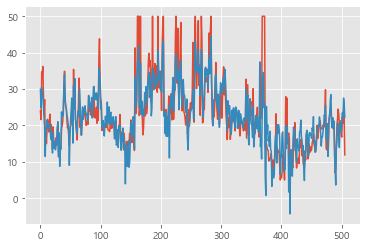

In [115]:
plt.plot(y)
plt.plot(model.predict(x_dataN))

# 과적합 판단


-> train test validation 